<a href="https://colab.research.google.com/github/Sardorbek-HUB/Predictive_Maintenance_for_Conveyor_Belts/blob/main/Model_Training_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Generate some sample data (using preprocessed data)
X_train = np.random.rand(100, 50, 3)  # Sample input data (100 sequences, each with 50 time steps and 3 features)
y_train = np.random.randint(2, size=100)  # Sample labels (binary classification)

# Define the LSTM model
model = keras.Sequential()

# LSTM layer
model.add(layers.LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))

# Output layer
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64)
# In this Model 20 epochs were trained with batch size of 64

Epoch 1/20
2/2 [==============================] - 3s 27ms/step - loss: 0.6951 - accuracy: 0.5200
Epoch 2/20
2/2 [==============================] - 0s 26ms/step - loss: 0.6935 - accuracy: 0.5200
Epoch 3/20
2/2 [==============================] - 0s 26ms/step - loss: 0.6932 - accuracy: 0.5200
Epoch 4/20
2/2 [==============================] - 0s 33ms/step - loss: 0.6929 - accuracy: 0.5200
Epoch 5/20
2/2 [==============================] - 0s 26ms/step - loss: 0.6924 - accuracy: 0.5200
Epoch 6/20
2/2 [==============================] - 0s 26ms/step - loss: 0.6919 - accuracy: 0.5200
Epoch 7/20
2/2 [==============================] - 0s 30ms/step - loss: 0.6917 - accuracy: 0.5200
Epoch 8/20
2/2 [==============================] - 0s 27ms/step - loss: 0.6916 - accuracy: 0.5200
Epoch 9/20
2/2 [==============================] - 0s 26ms/step - loss: 0.6916 - accuracy: 0.5200
Epoch 10/20
2/2 [==============================] - 0s 26ms/step - loss: 0.6911 - accuracy: 0.5200
Epoch 11/20
2/2 [============

In [5]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model with callbacks
history = model.fit(
    X_train, y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_split=0.2,  # You can specify a validation set
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
3/3 [==============================] - 1s 323ms/step - loss: 0.6818 - accuracy: 0.5750 - val_loss: 0.7245 - val_accuracy: 0.4000
Epoch 2/10
3/3 [==============================] - 0s 45ms/step - loss: 0.6776 - accuracy: 0.5750 - val_loss: 0.7368 - val_accuracy: 0.3500
Epoch 3/10
1/3 [=========>....................] - ETA: 0s - loss: 0.6352 - accuracy: 0.6875

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 50ms/step - loss: 0.6839 - accuracy: 0.5625 - val_loss: 0.7615 - val_accuracy: 0.3500
Epoch 4/10
3/3 [==============================] - 0s 44ms/step - loss: 0.6779 - accuracy: 0.5750 - val_loss: 0.7292 - val_accuracy: 0.4000
Epoch 5/10
3/3 [==============================] - 0s 45ms/step - loss: 0.6743 - accuracy: 0.6000 - val_loss: 0.7256 - val_accuracy: 0.4000
Epoch 6/10
3/3 [==============================] - 0s 48ms/step - loss: 0.6743 - accuracy: 0.6000 - val_loss: 0.7292 - val_accuracy: 0.4000


Epoch 1/10
3/3 [==============================] - 0s 62ms/step - loss: 0.6733 - accuracy: 0.5875 - val_loss: 0.7224 - val_accuracy: 0.4000
Epoch 2/10
3/3 [==============================] - 0s 46ms/step - loss: 0.6715 - accuracy: 0.5875 - val_loss: 0.7118 - val_accuracy: 0.3500
Epoch 3/10
3/3 [==============================] - 0s 47ms/step - loss: 0.6748 - accuracy: 0.6125 - val_loss: 0.7035 - val_accuracy: 0.4000
Epoch 4/10
3/3 [==============================] - 0s 43ms/step - loss: 0.6721 - accuracy: 0.6250 - val_loss: 0.7139 - val_accuracy: 0.3500
Epoch 5/10
3/3 [==============================] - 0s 43ms/step - loss: 0.6697 - accuracy: 0.6125 - val_loss: 0.7297 - val_accuracy: 0.4000
Epoch 6/10
3/3 [==============================] - 0s 39ms/step - loss: 0.6699 - accuracy: 0.5875 - val_loss: 0.7492 - val_accuracy: 0.3500
Epoch 7/10
3/3 [==============================] - 0s 41ms/step - loss: 0.6699 - accuracy: 0.5750 - val_loss: 0.7500 - val_accuracy: 0.4000
Epoch 8/10
3/3 [===========

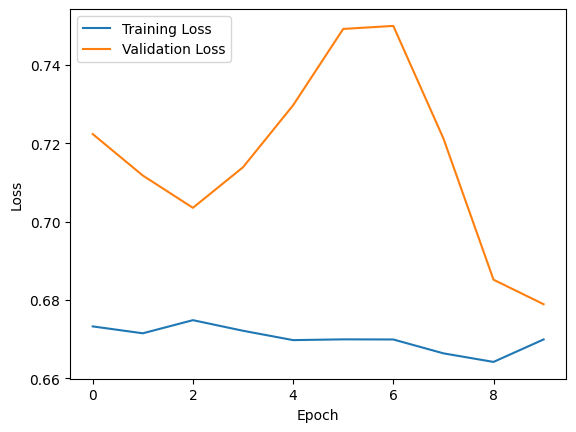

In [16]:
import matplotlib.pyplot as plt

# Visualize training progress
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
